In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as p
import numpy as np
import flamingo_analysis as fa 
import tangos as db


db.init_db('data-hubble-flow.db')


import seaborn as sns 

from importlib import reload
import flamingo_tangos as ft 
reload(ft)

def dm_gas_plot(radius = 1.0, dm_in_radius=True, sim="L0200N0360_HYDRO_STRONGEST_AGN"):
    log_radius = np.log10(radius)
    log_cap_radius = log_radius + 0.15

    ts = db.get_timestep(f"{sim}/%6.hdf5")

    M200m, gas_mass_enclosed_r_2d, gas_mass_enclosed_1Mpc_3d, gas_mass_cap_r_2d, dm_mass_1Mpc_2d  = \
            ts.calculate_all('M200m()', f'at({log_radius},gas_mass_enclosed_2d)', f'at({log_radius},gas_mass_enclosed)',
                                                    f'2*at({log_radius}, gas_mass_enclosed_2d) - at({log_cap_radius}, gas_mass_enclosed_2d)',
                                                    f'at({log_radius}, dm_mass_enclosed_2d)')

    
    if dm_in_radius:
        M_dm = dm_mass_1Mpc_2d
    else:
        M_dm = M200m

    sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_cap_r_2d), levels=[0.01, 0.05, 0.33], label="CAP 2D", color='black')
    sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_enclosed_r_2d), levels=[0.01, 0.05, 0.33], label="Non-CAP 2D", color='orange')
    p.plot([12., 16.], [11., 15.], 'k:', label="10%")
   
    p.xlim(12.5, 15.5)
    p.ylim(10.0, 15.0)

    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='black', label='CAP'),
                       Line2D([0], [0], color='orange', label='Uncompensated'),
                       Line2D([0], [0], color='k', linestyle=':', label='10%')]
    p.legend(handles=legend_elements, loc='upper left', fontsize=14)
    #p.loglog()
    p.ylabel(f"Gas mass ({radius} Mpc) / M$_{{\\odot}}$")

    if dm_in_radius:
        p.xlabel(f"DM mass ({radius} Mpc) / M$_{{\\odot}}$")
    else:
        p.xlabel(f"M$_{{200m}}$ / M$_{{\\odot}}$")
    p.title("Flamingo "+ts.simulation.basename)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
db.all_simulations()

[<Simulation("L0200N0360_HYDRO_STRONGEST_AGN")>,
 <Simulation("L0200N0360_HYDRO_FIDUCIAL")>,
 <Simulation("L0200N0360_HYDRO_WEAK_AGN")>]

/var/folders/vk/zg9_2k_512l3syhc8kdzkzwm0000gp/T/ipykernel_25620/2840181643.py:38: RuntimeWarning: invalid value encountered in log10
  sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_cap_r_2d), levels=[0.01, 0.05, 0.33], label="CAP 2D", color='black')


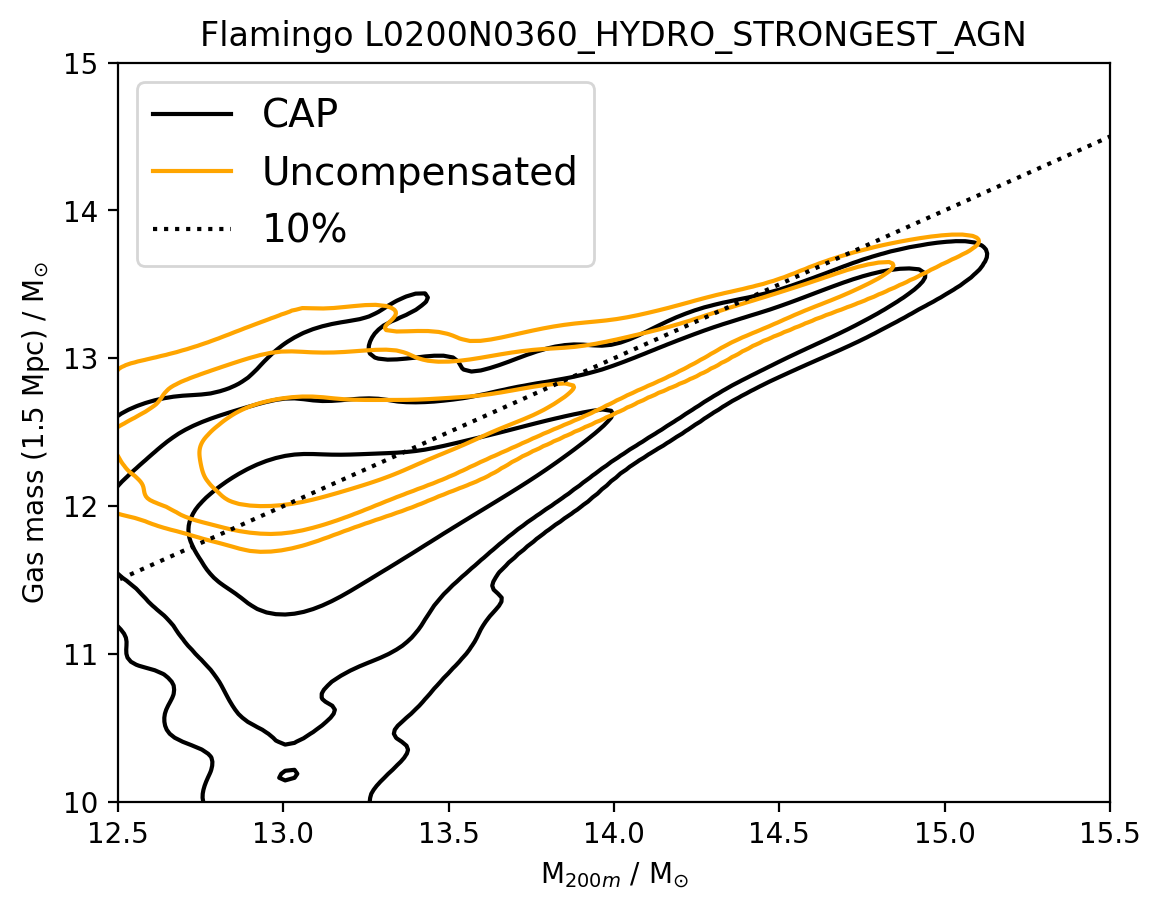

In [17]:
dm_gas_plot(1.5,dm_in_radius=False)

/var/folders/vk/zg9_2k_512l3syhc8kdzkzwm0000gp/T/ipykernel_25620/2840181643.py:38: RuntimeWarning: invalid value encountered in log10
  sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_cap_r_2d), levels=[0.01, 0.05, 0.33], label="CAP 2D", color='black')


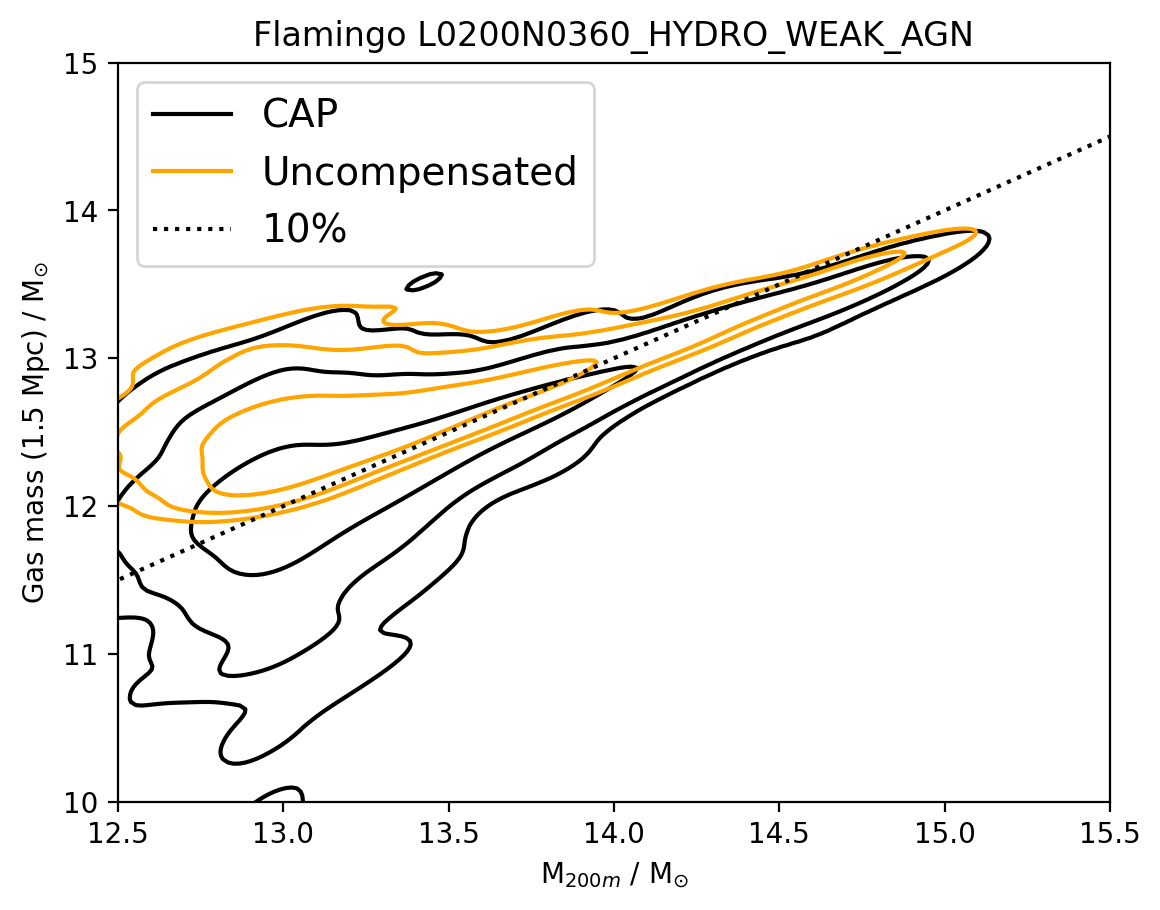

In [18]:
dm_gas_plot(1.5,dm_in_radius=False, sim="%WEAK%")

/var/folders/vk/zg9_2k_512l3syhc8kdzkzwm0000gp/T/ipykernel_25620/4032645311.py:38: RuntimeWarning: invalid value encountered in log10
  sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_cap_r_2d), levels=[0.01, 0.05, 0.33], label="CAP 2D", color='black')


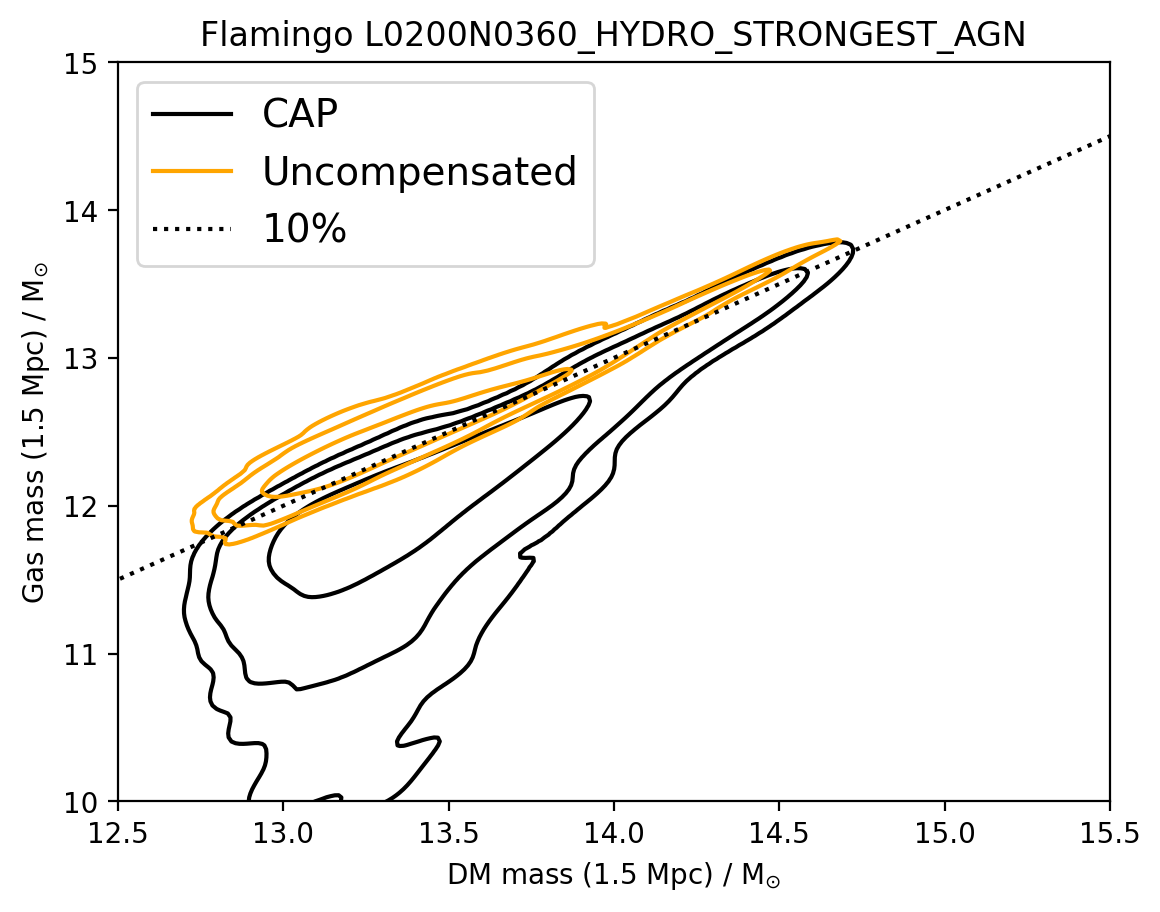

In [15]:
dm_gas_plot(1.5,dm_in_radius=True)

/var/folders/vk/zg9_2k_512l3syhc8kdzkzwm0000gp/T/ipykernel_25620/2840181643.py:38: RuntimeWarning: invalid value encountered in log10
  sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_cap_r_2d), levels=[0.01, 0.05, 0.33], label="CAP 2D", color='black')


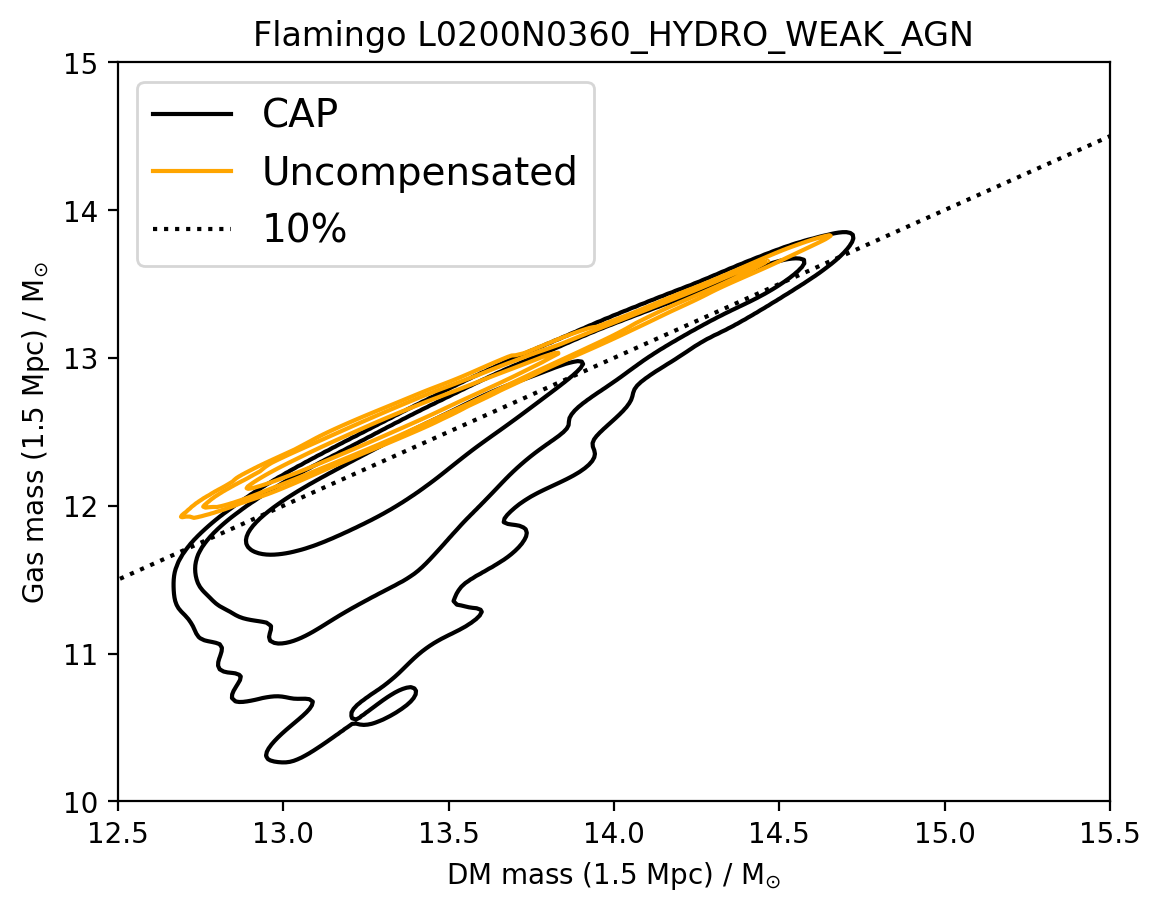

In [19]:
dm_gas_plot(1.5,dm_in_radius=True,sim="%WEAK%")

In [20]:
db.init_db('data2.db')


/var/folders/vk/zg9_2k_512l3syhc8kdzkzwm0000gp/T/ipykernel_25620/2840181643.py:38: RuntimeWarning: invalid value encountered in log10
  sns.kdeplot(x = np.log10(M_dm), y = np.log10(gas_mass_cap_r_2d), levels=[0.01, 0.05, 0.33], label="CAP 2D", color='black')


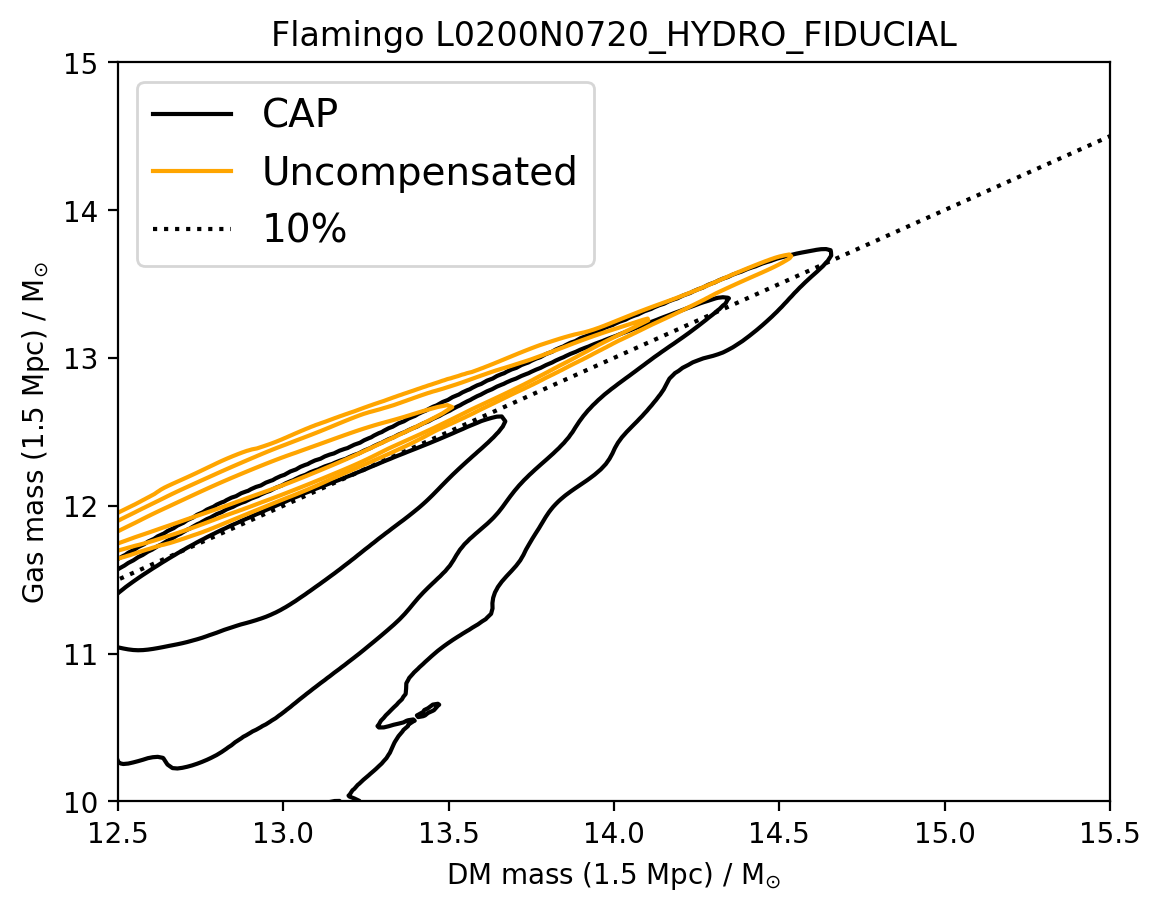

In [21]:
dm_gas_plot(1.5,dm_in_radius=True,sim="%720%")